In [45]:
from ftplib import FTP

ftp = FTP('gms.cr.chiba-u.ac.jp')
ftp.login()
print("Connected to FTP server successfully!")

ftp.cwd('/pub/GMS5/RVISSR/199706/')
ftp.dir()

Connected to FTP server successfully!
-rw-r--r--   1 ftp      ftp      135440482 Jan 14  2008 199706010000.tar.gz
-rw-r--r--   1 ftp      ftp      135947737 Jan 14  2008 199706010100.tar.gz
-rw-r--r--   1 ftp      ftp      135405343 Jan 14  2008 199706010200.tar.gz
-rw-r--r--   1 ftp      ftp      135608511 Jan 14  2008 199706010300.tar.gz
-rw-r--r--   1 ftp      ftp      65327668 Jan 14  2008 199706010400.tar.gz
-rw-r--r--   1 ftp      ftp      136812874 Jan 14  2008 199706010500.tar.gz
-rw-r--r--   1 ftp      ftp      135500558 Jan 14  2008 199706010600.tar.gz
-rw-r--r--   1 ftp      ftp      134400770 Jan 14  2008 199706010700.tar.gz
-rw-r--r--   1 ftp      ftp      133329346 Jan 14  2008 199706010800.tar.gz
-rw-r--r--   1 ftp      ftp      132057127 Jan 14  2008 199706010900.tar.gz
-rw-r--r--   1 ftp      ftp      94065539 Jan 14  2008 199706011000.tar.gz
-rw-r--r--   1 ftp      ftp      94080300 Jan 14  2008 199706011100.tar.gz
-rw-r--r--   1 ftp      ftp      94145286 Jan 14  200

In [46]:
local_filename = f"199706090900.tar.gz"
remote_filename = f"199706090900.tar.gz"

with open(local_filename, 'wb') as file:
    ftp.retrbinary(f'RETR {remote_filename}', file.write)

print(f"File '{local_filename}' downloaded successfully!")

ftp.quit()

import tarfile
import os

if os.path.exists(local_filename):
  with tarfile.open(local_filename, 'r:gz') as tar:
    tar.extractall()
print(f"File '{local_filename}' extracted successfully!")

File '199706090900.tar.gz' downloaded successfully!


/tmp/ipython-input-3137625873.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


File '199706090900.tar.gz' extracted successfully!


In [30]:
import pandas as pd

table = pd.read_csv('/content/ir1_tbl_19970609_0831.csv')
print(table.head(200))

       0  130.000
0      1  130.000
1      2  130.000
2      3  130.000
3      4  130.000
4      5  130.000
..   ...      ...
195  196  308.514
196  197  308.900
197  198  309.284
198  199  309.668
199  200  310.050

[200 rows x 2 columns]


In [ ]:
import glob
import pandas as pd
import numpy as np

relevant_files = []
relevant_files.extend(glob.glob('/content/ir1_tbl*.csv'))
relevant_files.extend(glob.glob('/content/ir1_count*.raw'))

# Assuming glob returns only one file each as you mentioned
table = pd.read_csv(relevant_files[0])

# Read the raw file as binary data
file_path = relevant_files[1]
with open(file_path, 'rb') as f:
    raw_data = f.read()

# Decode the raw data into a numpy array
image_width = 2400
image_height = 2400
dtype = np.uint8
decoded_data = np.frombuffer(raw_data, dtype=dtype).reshape((image_height, image_width))

print("Table head:", table.head())
print("Decoded data shape:", decoded_data.shape)

In [47]:
import numpy as np

file_path = '/content/ir1_count_19970609_0831.raw'
image_width = 2400
image_height = 2400
dtype = np.uint8

with open(file_path, 'rb') as f:
    raw_data = f.read()

decoded_data = np.frombuffer(raw_data, dtype=dtype).reshape((image_height, image_width))

print("Decoded data shape:", decoded_data.shape)
print("Decoded data type:", decoded_data.dtype)

Decoded data shape: (2400, 2400)
Decoded data type: uint8


In [48]:
# Assuming 'table' is already loaded from '/content/ir1_tbl_19970609_0831.csv'
# and 'decoded_data' is the numpy array from the raw file.

# Create a mapping from raw values to calibrated values from the table
calibration_map = table.set_index(table.columns[0])[table.columns[1]]

# Apply the calibration mapping to the decoded data
calibrated_data = np.vectorize(calibration_map.get)(decoded_data)

print("Calibrated data shape:", calibrated_data.shape)
print("Calibrated data type:", calibrated_data.dtype)

Calibrated data shape: (2400, 2400)
Calibrated data type: float64


Creating the plot...


/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


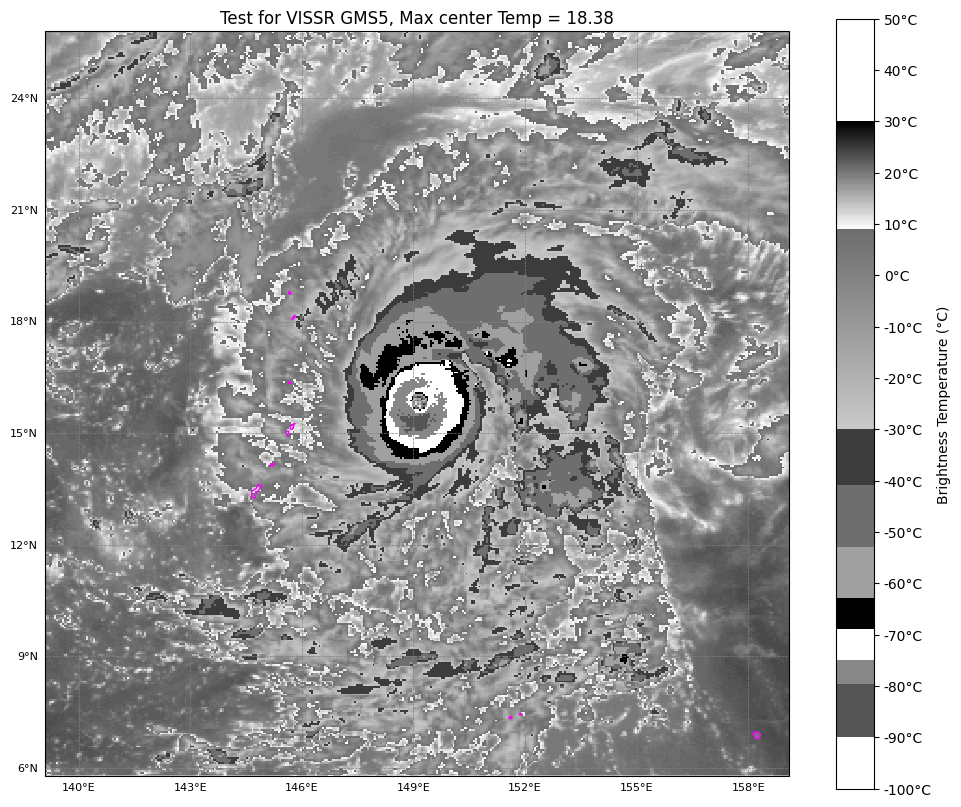

In [53]:
import subprocess, sys, datetime, requests
packages = ["cartopy"]
for package in packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmap_collection as cc

col, vmax, vmin = cc.bd05()

lat, lon = 15.8, 149.1

data_shape = (2400, 2400)
data_type = np.uint8

lat_bounds = (60, -60)
lon_bounds = (80, 200)

file_path = '/content/ir1_count_19970609_0831.raw'

# --- 3. Generate coordinate arrays for plotting ---
latitudes = np.linspace(lat_bounds[0], lat_bounds[1], data_shape[0])
longitudes = np.linspace(lon_bounds[0], lon_bounds[1], data_shape[1])

# --- 4. Plot the data as a geographical map + find center temp ---
print("Creating the plot...")
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1, color='magenta')

gls = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gls.xlocator = mticker.FixedLocator(range(80, 201, 3))  # Control gridline spacing
gls.ylocator = mticker.FixedLocator(range(-60, 61, 3))
#gls.xformatter = LONGITUDE_FORMATTER
gls.yformatter = LATITUDE_FORMATTER
gls.xlabel_style = {'size': 8, 'color': 'k'}  # Customize label style
gls.ylabel_style = {'size': 8, 'color': 'k'}
gls.top_labels = False
gls.right_labels = False

mesh = ax.pcolormesh(longitudes, latitudes, calibrated_data, cmap=col, vmax=vmax, vmin=vmin)

cbar = fig.colorbar(mesh, ax=ax)
# Set custom ticks in Celsius with intervals of 10°C
celsius_tick_values = np.arange(-100, 60, 10)  # Adjust the range if needed
kelvin_tick_values = celsius_tick_values + 273.15  # Convert Celsius ticks to Kelvin

# Update the colorbar ticks and labels
cbar.set_ticks(kelvin_tick_values)  # Set the ticks in Kelvin
cbar.set_ticklabels([f"{int(temp)}°C" for temp in celsius_tick_values])  # Label them in Celsius
cbar.set_label('Brightness Temperature (°C)')

# Finding center temperature...
# Find the indices corresponding to the specified lat, lon and a 1-degree radius
lat_index = np.abs(latitudes - lat).argmin()
lon_index = np.abs(longitudes - lon).argmin()

# Calculate the range of indices within 1 degree
lat_degree_span = np.abs(latitudes[1] - latitudes[0])
lon_degree_span = np.abs(longitudes[1] - longitudes[0])

lat_radius_indices = int(1 / lat_degree_span)
lon_radius_indices = int(1 / lon_degree_span)

# Ensure the indices are within the bounds of the array
min_lat_index = max(0, lat_index - lat_radius_indices)
max_lat_index = min(data_shape[0], lat_index + lat_radius_indices + 1)
min_lon_index = max(0, lon_index - lon_radius_indices)
max_lon_index = min(data_shape[1], lon_index + lon_radius_indices + 1)

# Extract the subset of data
data_subset = calibrated_data[min_lat_index:max_lat_index, min_lon_index:max_lon_index]

# Find the maximum value in the subset and correct it for calibration
max_value = np.max(data_subset)
max_value_celcius_calibration_corrected = max_value - 273.15

ax.set_title(f'Test for VISSR GMS5, Max center Temp = {max_value_celcius_calibration_corrected:.02f}')
ax.grid(True, linestyle='--', alpha=0.6)

ax.set_xlim(lon-10, lon+10)
ax.set_ylim(lat-10, lat+10)

plt.show()

In [44]:
import glob
import os

files_to_remove = []
files_to_remove.extend(glob.glob('/content/*.tar.gz'))
files_to_remove.extend(glob.glob('/content/*.raw'))
files_to_remove.extend(glob.glob('/content/*.csv'))

for f in files_to_remove:
    os.remove(f)